### Zadatak 3.

Jedan proizvodjač kafe je u toku 12 nedelja pratio uspešnost prodaje kesica kafe u zavisnosti od širine dela police koju je imao na raspolaganju. Tako dobijene vrednosti su zabeležene u datoteci coffee.csv.


0) Ucitati podatke

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('coffee.csv')
df.shape

In [4]:
df

,ShelfSpace,Sales
0,6,526
1,3,421
2,6,581
3,9,630
4,3,412
5,9,560
6,6,434
7,3,443
8,9,590
9,6,570



a) Nacrtati grafik zavisnosti prodaje kesica kafe u odnosu na širine police. Da li postoji opravdanje za modelovanje ovog problema linearnom regresijom?

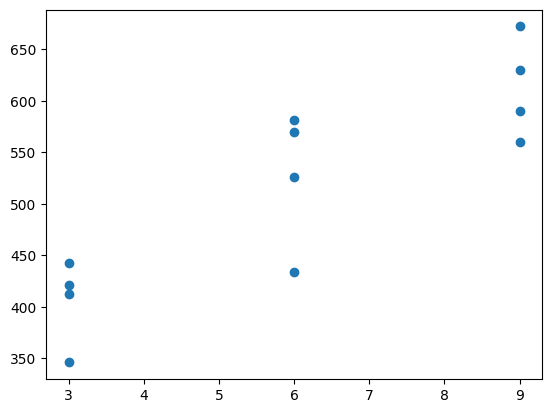

In [5]:
sirina = df['ShelfSpace']
prodaja = df['Sales']
from matplotlib import pyplot as plt
plt.plot(sirina, prodaja, 'o')

Iako prodaja u stvarnosti moze zavisiti od mnogih faktora - sa grafika se moze videti da sa vecom sirinom polica raste i broj prodaje pa je za ovako formulisan problem moguce koristiti linearnu regresiju

b) Odrediti odgovarajući regresioni model korišćenjem biblioteke scikit-learn.

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [9]:
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# mse, mae, r2

c) Odrediti regresioni model **bez** korišćenja biblioteke sciki-learn.

In [11]:
from numpy import linalg as LA
A = df
b = np.ones(df.shape[0])

In [12]:
LA.lstsq(A,b,rcond=None)

(array([-0.07635445,  0.00278997]),
 array([0.24158234]),
 2,
 array([1816.893534  ,    5.37458024]))



d) Dati ocenu greške modela na osnovu kontrolnih podataka koji su sadržani u datoteci *coffee_validation.csv*.


In [13]:
eval = pd.read_csv('coffee_validation.csv')
X_test = eval.drop('Sales', axis=1)
y_test = eval['Sales']
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, mae, r2

(3329.831569664903, 49.65079365079366, 0.7039827520209361)